In [43]:
# lowpass filter
# multi years
# vector plots

In [44]:
import pandas as pd
import xarray as xr
import datetime
import EcoFOCIpy.io.erddap as erddap
import numpy as np


In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

In [46]:
#load
url = "http://akutan.pmel.noaa.gov:8080/erddap"
adcp_01_data = xr.load_dataset(url+'/griddap/ADCP_Mooring_20bsp14a_final')
adcp_02_data = xr.load_dataset(url+'/griddap/ADCP_Mooring_22bsp14a_final')
adcp_03_data = xr.load_dataset(url+'/griddap/ADCP_Mooring_23bsp14a_final')
adcp_04_data = xr.load_dataset(url+'/griddap/ADCP_Mooring_24bsp14a_final')

/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'agc1' has multiple fill values {1e+35, -9999.0} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'agc2' has multiple fill values {1e+35, -9999.0} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'agc3' has multiple fill values {1e+35, -9999.0} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'agc4' has multiple fill values {1e+35, -9999.0} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/Users/bell/mambaforge/envs/

In [60]:

"""
EcoFOCI Cruise Seabird QuickLook

Plots data from csv and cnv files
"""
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from matplotlib.dates import DateFormatter, MonthLocator

__all__ = ["Timeseries1dStickPlot"]

class Timeseries1dStickPlot(object):

    mpl.rcParams['svg.fonttype'] = 'none'
    mpl.rcParams['ps.fonttype'] = 42
    mpl.rcParams['pdf.fonttype'] = 42
    
    def __init__(self, fontsize=10, labelsize=10, plotstyle='k-.', stylesheet='bmh'):
        """Initialize the timeseries with items that do not change.

        This sets up the axes and station locations. The `fontsize` and `spacing`
        are also specified here to ensure that they are consistent between individual
        station elements.

        Parameters
        ----------
        fontsize : int
            The fontsize to use for drawing text
        labelsize : int
          The fontsize to use for labels
        stylesheet : str
          Choose a mpl stylesheet [u'seaborn-darkgrid', 
          u'seaborn-notebook', u'classic', u'seaborn-v0_8-ticks', 
          u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', 
          u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', 
          u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', 
          u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', 
          u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', 
          u'seaborn-dark-palette']
        """

        self.fontsize = fontsize
        self.labelsize = labelsize
        self.plotstyle = plotstyle
        plt.style.use(stylesheet)

    @staticmethod
    def add_title(mooringid='',lat=-99.9,lon=-99.9,depth=9999,instrument=''):
      """Pass parameters to annotate the title of the plot

      This sets the standard plot title using common meta information from PMEL/EPIC style netcdf files

      Parameters
      ----------
      mooringid : str
        Mooring Identifier
      lat : float
        The latitude of the mooring
      lon : float
        The longitude of the mooring
      depth : int
        Nominal depth of the instrument
      instrument : str
        Name/identifier of the instrument plotted
      """  
      ptitle = ("Plotted on: {time:%Y/%m/%d %H:%M} \n from {mooringid} Lat: {latitude:3.3f}  Lon: {longitude:3.3f}" 
            " Depth: {depth}\n : {instrument}").format(
            time=datetime.datetime.now(), 
                  mooringid=mooringid,
                  latitude=lat, 
                  longitude=lon, 
                  depth=depth,
                  instrument=instrument )

      return ptitle


    def plot(self, timedata=None, udata=None, vdata=None, ylabel=None, linescale=1, **kwargs):

      if kwargs['rotate'] != 0.0:
          #when rotating vectors - positive(+) rotation is equal to cw of the axis (ccw of vector)
          #                      - negative(+) rotation is equal to ccw of the axis (cw of the vector)
          print("rotating vectors")
          angle_offset_rad = np.deg2rad(kwargs['rotate'])
          udata = udata*np.cos(angle_offset_rad) + vdata*np.sin(angle_offset_rad)
          vdata = -1.*udata*np.sin(angle_offset_rad) + vdata*np.cos(angle_offset_rad)

      magnitude = np.sqrt(udata**2 + vdata**2)

      fig, (ax1,ax2) = plt.subplots(2,1,sharex='col',figsize=(11,4.25))


      # Plot u and v components
      # Plot quiver
      ax1.set_ylim(-1*np.nanmax(magnitude), np.nanmax(magnitude))
      fill1 = ax1.fill_between(timedata, magnitude, 0, color='k', alpha=0.1)

      # Fake 'box' to be able to insert a legend for 'Magnitude'
      """
      p = ax1.add_patch(plt.Rectangle((1,1),1,1,fc='k',alpha=0.1))
      leg1 = ax1.legend([p], ["Current magnitude [cm/s]"],loc='lower right')
      leg1._drawFrame=False
      """

      # 1D Quiver plot
      q = ax1.quiver(timedata,0,udata,vdata,color='r',units='y',scale_units='y',
                     scale = 1,headlength=1,headaxislength=1,width=0.04*linescale,alpha=.95)
      qk = plt.quiverkey(q,0.2, 0.05, 5,r'$5 \frac{cm}{s}$',labelpos='W',
                     fontproperties={'weight': 'bold'})


      # Plot u and v components
      ax1.set_xticklabels(ax1.get_xticklabels(), visible=False)
      ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
      ax1.axes.get_xaxis().set_visible(False)
      ax1.set_xlim(timedata.min(),timedata.max())
      ax1.set_ylabel("Velocity (cm/s)")
      ax2.plot(timedata, vdata, 'b-', linewidth=0.25)
      ax2.plot(timedata, udata, 'g-', linewidth=0.25)
      ax2.set_xlim(timedata.min(),timedata.max())
      ax2.set_xlabel("Date (UTC)")
      ax2.set_ylabel("Velocity (cm/s)")
      ax2.xaxis.set_major_locator(MonthLocator())
      ax2.xaxis.set_minor_locator(MonthLocator(bymonth=range(1,13), bymonthday=15))
      ax2.xaxis.set_major_formatter(ticker.NullFormatter())
      ax2.xaxis.set_minor_formatter(DateFormatter('%b %y'))
      ax1.spines['bottom'].set_visible(False)
      ax2.spines['top'].set_visible(False)
      ax1.xaxis.set_ticks_position('top')
      ax2.xaxis.set_ticks_position('bottom')
      ax2.yaxis.set_ticks_position('both')
      ax2.tick_params(axis='both', which='minor', labelsize=self.labelsize)
      ax1.tick_params(axis='both', which='minor', labelsize=self.labelsize)
      #manual time limit sets
      #ax1.set_xlim([datetime.datetime(2016,2,1),datetime.datetime(2016,9,15)])
      #ax2.set_xlim([datetime.datetime(2016,2,1),datetime.datetime(2016,9,15)])
      # Set legend location - See: http://matplotlib.org/Volumes/WDC_internal/users/legend_guide.html#legend-location
      leg2 = plt.legend(['v','u'],loc='upper left')
      leg2._drawFrame=False

      if kwargs['ylim']:
          ax1.set_ylim(kwargs['ylim'][0],kwargs['ylim'][1])
          ax2.set_ylim(kwargs['ylim'][0],kwargs['ylim'][1])
      if kwargs['xlim']:
          ax1.set_xlim(datetime.date(kwargs['xlim'][0],1,1),datetime.date(kwargs['xlim'][1],1,1))
          ax1.set_xlim(datetime.date(kwargs['xlim'][0],1,1),datetime.date(kwargs['xlim'][1],1,1))
      return plt, fig


In [55]:
#lowpass filter
import EcoFOCIpy.math.lanzcos as lanzcos #<- instrument specific

def lanzcos_filter_multi(xdf,variable):
    for g, group in xdf[variable].dropna(dim='depth',how='all').groupby('depth'):
        print(g)
        dft = group.to_dataframe().dropna()
        #
        ## missing data fill limited by number of hours to linearly interpolate
        temp = dft[variable].interpolate(method='linear',limit=6)
    
        # get index of missing data that wasn't filled
        # the remaining missing data will continue to be missing after analysis
        # this data and the edges of the timeseries need to have the effects of the filter window accounted for
    
        missing_index = np.isnan(temp)
        temp = dft[variable].interpolate(method='linear')
    
        #address gaps at beginning and end... back fill... and forward fill at end... 
        # the filter window will correct small gaps at the tails but will become worse as the leading gaps get bigger
        temp.bfill(inplace=True)
        temp.ffill(inplace=True)
    
        #filter data with lanzcos filter
        lanzcosfiltered = lanzcos.lanzcos(temp.values,1,35) + dft[variable].mean()
        
        fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(4,1), sharex=True)
        temp.plot(ax=axes)
        (temp *0 + lanzcosfiltered).plot(ax=axes)
        
        # (temp *0 + lanzcosfiltered).to_csv(f'{dataset_name}_{variable}_35hr.{g}m.csv')
    return(temp *0 + lanzcosfiltered)
    
def lanzcos_filter_depth(xdf,variable,depth_ind = -1):
    dft = xdf[variable].dropna(dim='depth',how='all').isel({'depth':depth_ind,'latitude':0,'longitude':0}).to_dataframe().dropna()
    print(dft.depth.iloc[0])

    #
    ## missing data fill limited by number of hours to linearly interpolate
    temp = dft[variable].interpolate(method='linear',limit=6)

    # get index of missing data that wasn't filled
    # the remaining missing data will continue to be missing after analysis
    # this data and the edges of the timeseries need to have the effects of the filter window accounted for

    missing_index = np.isnan(temp)
    temp = dft[variable].interpolate(method='linear')

    #address gaps at beginning and end... back fill... and forward fill at end... 
    # the filter window will correct small gaps at the tails but will become worse as the leading gaps get bigger
    temp.bfill(inplace=True)
    temp.ffill(inplace=True)

    #filter data with lanzcos filter
    lanzcosfiltered = lanzcos.lanzcos(temp.values,1,35) + dft[variable].mean()
    
    fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(4,1), sharex=True)
    temp.plot(ax=axes)
    (temp *0 + lanzcosfiltered).plot(ax=axes)
    
    # (temp *0 + lanzcosfiltered).to_csv(f'{dataset_name}_{variable}_35hr.{g}m.csv')
    return(temp *0 + lanzcosfiltered)

28.0


/var/folders/6r/n_mpcj7d7pdf9ncqvjy5vb8c0000jm/T/ipykernel_63414/1879299318.py:5: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  u_comp = pd.concat([u_comp,lanzcos_filter_depth(adcp_01_data,'u_comp_current',-1)])


25.0
23.0
20.0
28.0


/var/folders/6r/n_mpcj7d7pdf9ncqvjy5vb8c0000jm/T/ipykernel_63414/1879299318.py:10: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  v_comp = pd.concat([v_comp,lanzcos_filter_depth(adcp_01_data,'v_comp_current',-1)])


25.0
23.0
20.0


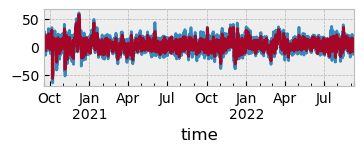

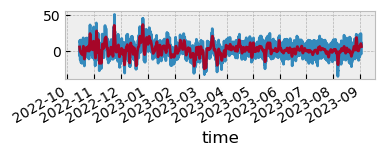

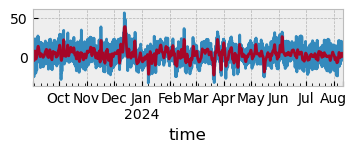

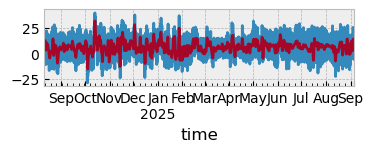

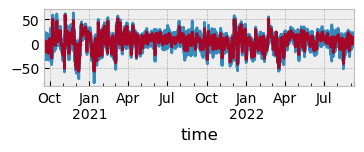

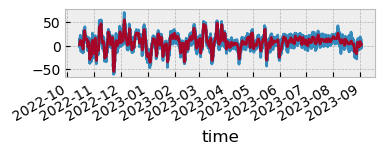

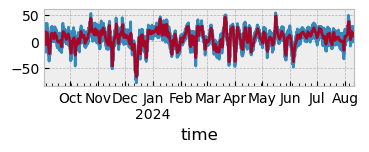

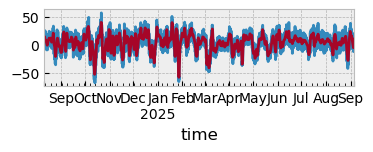

In [62]:
u_comp = pd.DataFrame()
v_comp = pd.DataFrame()

#index -1 and 2 (deep and shallow)
u_comp = pd.concat([u_comp,lanzcos_filter_depth(adcp_01_data,'u_comp_current',-1)])
u_comp = pd.concat([u_comp,lanzcos_filter_depth(adcp_02_data,'u_comp_current',-1)])
u_comp = pd.concat([u_comp,lanzcos_filter_depth(adcp_03_data,'u_comp_current',-1)])
u_comp = pd.concat([u_comp,lanzcos_filter_depth(adcp_04_data,'u_comp_current',-1)])

v_comp = pd.concat([v_comp,lanzcos_filter_depth(adcp_01_data,'v_comp_current',-1)])
v_comp = pd.concat([v_comp,lanzcos_filter_depth(adcp_02_data,'v_comp_current',-1)])
v_comp = pd.concat([v_comp,lanzcos_filter_depth(adcp_03_data,'v_comp_current',-1)])
v_comp = pd.concat([v_comp,lanzcos_filter_depth(adcp_04_data,'v_comp_current',-1)])

In [63]:
u_comp.resample('1h').mean().to_csv('M14.hourly.ucomp.unrotated.csv')
v_comp.resample('1h').mean().to_csv('M14.hourly.vcomp.unrotated.csv')

rotating vectors
rotating vectors
rotating vectors
rotating vectors
rotating vectors


/var/folders/6r/n_mpcj7d7pdf9ncqvjy5vb8c0000jm/T/ipykernel_63414/909511405.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/var/folders/6r/n_mpcj7d7pdf9ncqvjy5vb8c0000jm/T/ipykernel_63414/909511405.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/var/folders/6r/n_mpcj7d7pdf9ncqvjy5vb8c0000jm/T/ipykernel_63414/909511405.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/var/folders/6r/n_mpcj7d7pdf9ncqvjy5vb8c0000jm/T/ipykernel_63414/909511405.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or u

rotating vectors


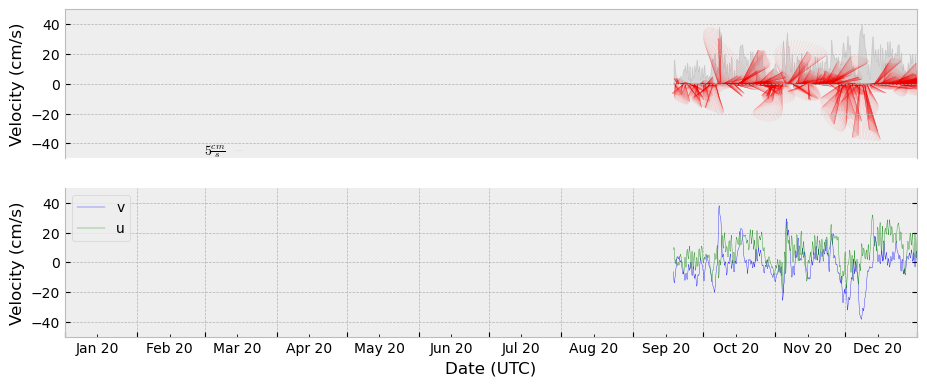

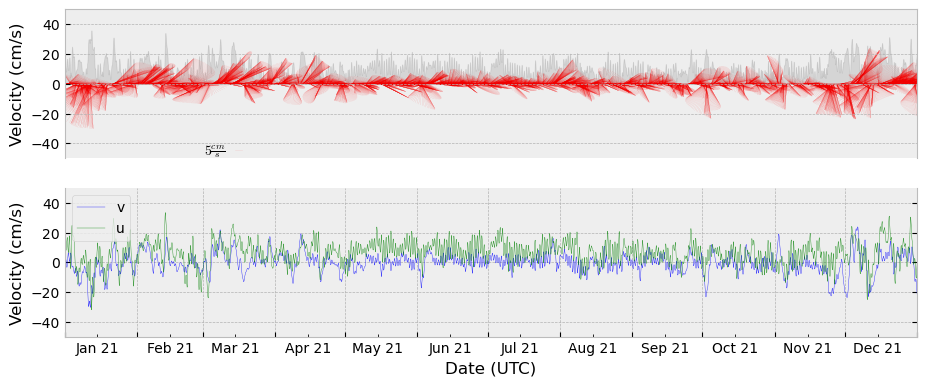

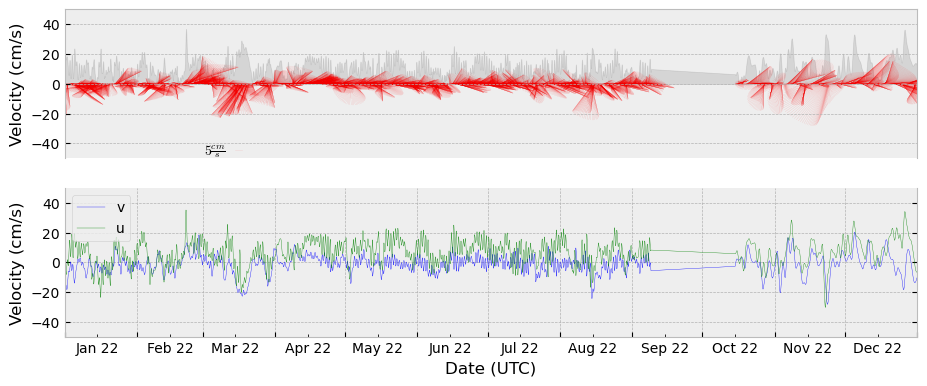

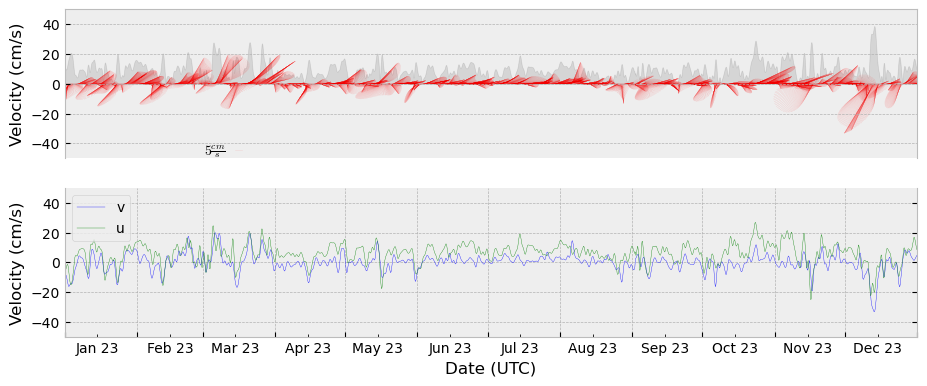

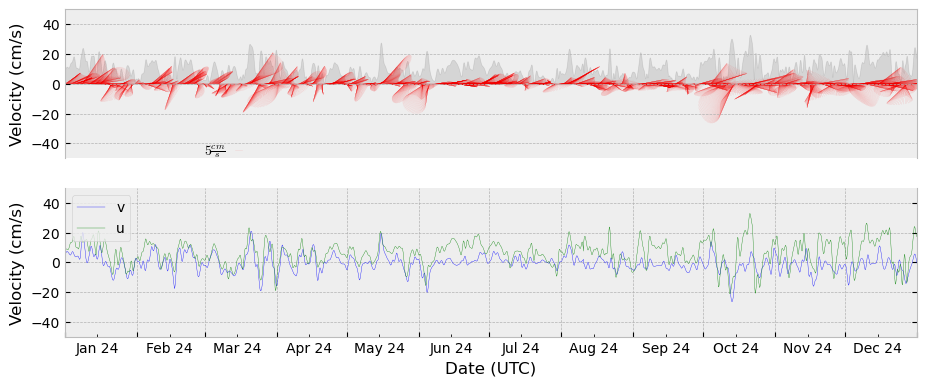

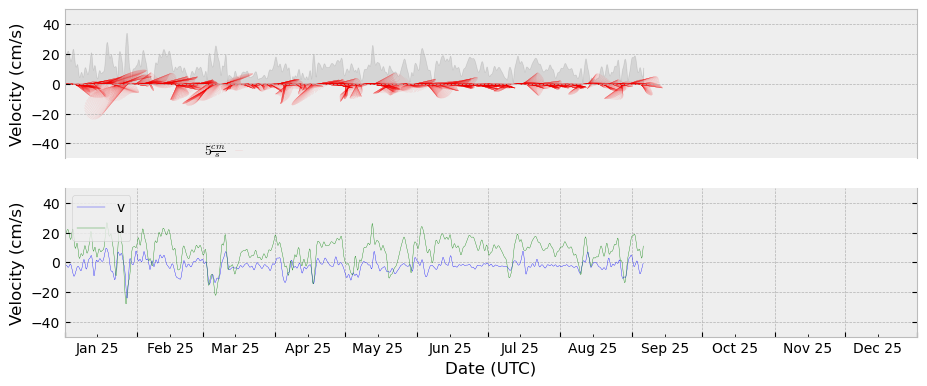

In [64]:
for y, years in u_comp.groupby(u_comp.index.year):
    stickplot = Timeseries1dStickPlot()
    fig,ax = stickplot.plot(years.index,
                            udata=years['u_comp_current'],
                            vdata=v_comp.groupby(v_comp.index.year).get_group(y)['v_comp_current'], rotate=45, ylim=[-50,50], xlim=[y,y+1])